In [1]:
library(ggplot2)
library(plyr)
#load("C:/Users/6609/Documents/data.rData")
Sample <- read.csv("data/Sample.csv")

In [2]:
str(Sample)

'data.frame':	9426 obs. of  24 variables:
 $ Row.ID              : int  18606 20847 23086 23087 23088 23597 25549 20228 19483 24782 ...
 $ Order.Priority      : Factor w/ 6 levels "Critical","Critical ",..: 6 3 6 6 6 5 4 6 4 3 ...
 $ Discount            : num  0.01 0.01 0.03 0.01 0 0.09 0.08 0.02 0.08 0.01 ...
 $ Unit.Price          : num  2.88 2.84 6.68 5.68 205.99 ...
 $ Shipping.Cost       : num  0.5 0.93 6.15 3.6 2.5 14.3 26.3 26 6.81 0.99 ...
 $ Customer.ID         : int  2 3 3 3 3 3 3 5 5 6 ...
 $ Customer.Name       : Factor w/ 2703 levels "Aaron Davies Bruce",..: 1140 264 264 264 264 264 264 2234 2234 634 ...
 $ Ship.Mode           : Factor w/ 3 levels "Delivery Truck",..: 3 2 2 3 2 2 1 1 3 3 ...
 $ Customer.Segment    : Factor w/ 4 levels "Consumer","Corporate",..: 2 2 2 2 2 2 2 3 3 3 ...
 $ Product.Category    : Factor w/ 3 levels "Furniture","Office Supplies",..: 2 2 2 2 3 2 3 1 2 2 ...
 $ Product.Sub.Category: Factor w/ 17 levels "Appliances","Binders and Binder Accessories

In [10]:
sample_data <- as.Date(Sample$Order.Date)
year_p <- as.POSIXlt(sample_data)
year <- year_p$year + 1900
month <- year_p$mon + 1
Sample <- cbind(Sample,year,month)

In [11]:
sample_area <- ddply(Sample,~year,summarise,sum=sum(Quantity.ordered.new))

In [12]:
head(sample_area)

year,sum
2010,25268
2011,29634
2012,32441
2013,42721


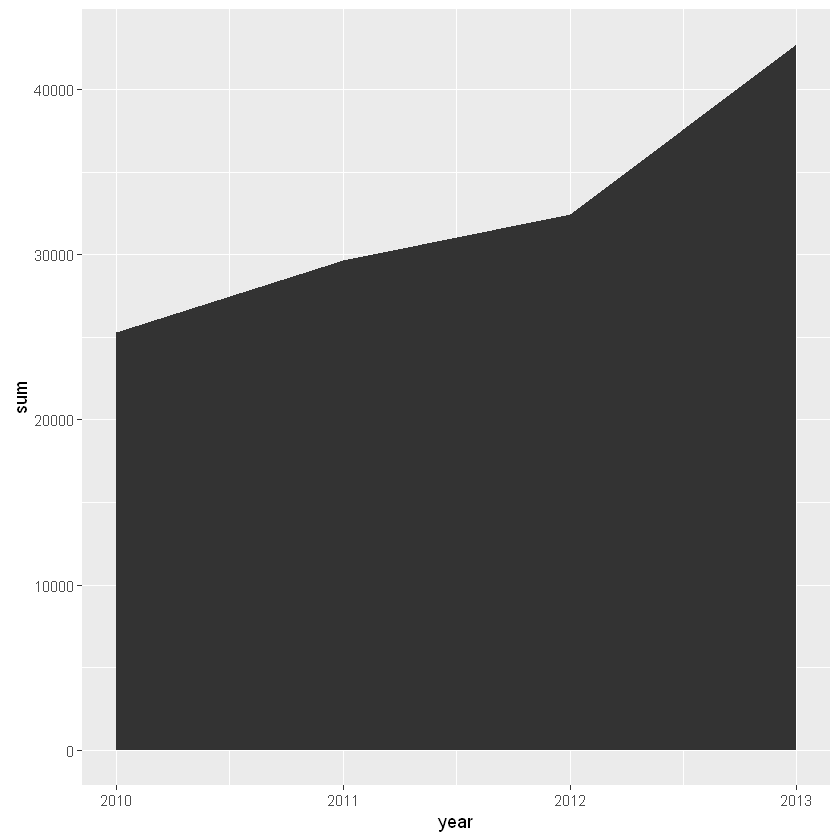

In [13]:
#only year area-chart
ggplot(sample_area,aes(x=year, y=sum)) + geom_area()

In [14]:
sample_area <- ddply(Sample, c("year","Region"),summarise,sum=sum(Quantity.ordered.new))

In [15]:
head(sample_area)

year,Region,sum
2010,Central,6575
2010,East,7031
2010,South,5045
2010,West,6617
2011,Central,8788
2011,East,7984


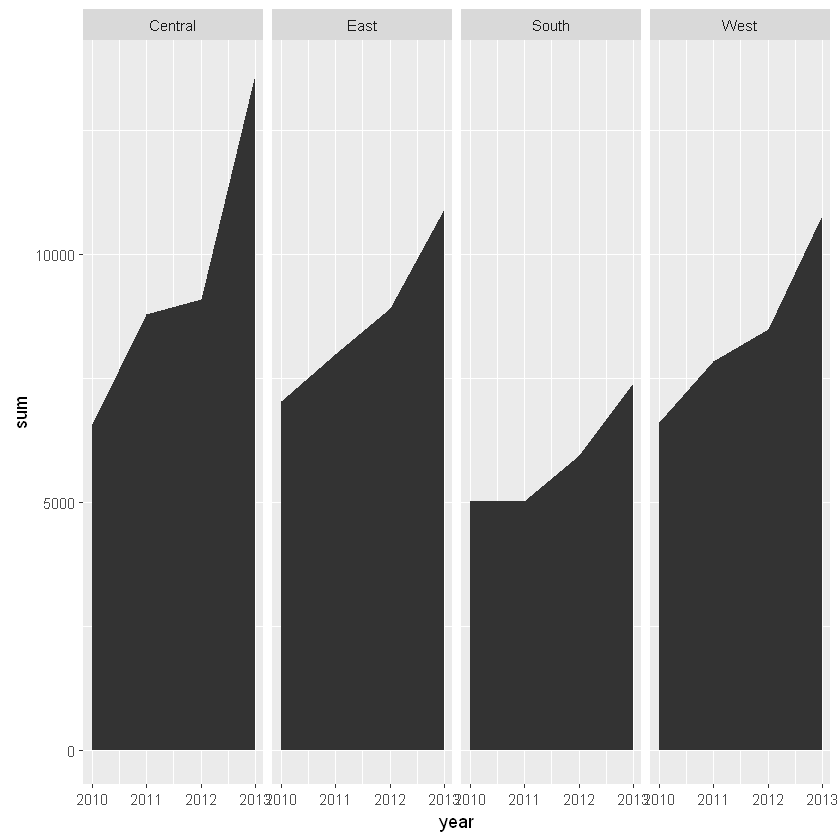

In [16]:
#including:region, year
ggplot(sample_area,aes(x=year, y=sum)) + geom_area() + facet_grid(. ~ Region)

In [17]:
Sample$Order.Date <- as.Date(Sample$Order.Date)
sample_quarter <- quarters(Sample$Order.Date)
Sample <- cbind(Sample,sample_quarter)
head(Sample)

Row.ID,Order.Priority,Discount,Unit.Price,Shipping.Cost,Customer.ID,Customer.Name,Ship.Mode,Customer.Segment,Product.Category,...,Ship.Date,Profit,Quantity.ordered.new,Sales,Order.ID,year,month,year.1,month.1,sample_quarter
18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,2012/5/30,1.3200,2,5.90,88525,2012,5,2012,5,Q2
20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,2010/7/8,4.5600,4,13.01,88522,2010,7,2010,7,Q3
23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,2011/7/28,-47.6400,7,49.92,88523,2011,7,2011,7,Q3
23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,2011/7/28,-30.5100,7,41.64,88523,2011,7,2011,7,Q3
23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,2011/7/27,998.2023,8,1446.67,88523,2011,7,2011,7,Q3
23597,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,2011/11/11,1388.0523,37,2011.67,88524,2011,11,2011,11,Q4


In [19]:
sample_area <- ddply(Sample, c("year","sample_quarter","Region"),summarise,sum=sum(Quantity.ordered.new))
head(sample_area)

year,sample_quarter,Region,sum
2010,Q1,Central,1152
2010,Q1,East,1224
2010,Q1,South,986
2010,Q1,West,1163
2010,Q2,Central,1007
2010,Q2,East,1989


In [20]:
class(sample_area$sample_quarter)

[1] "factor"

In [21]:
#class(quarter):factor cannot draw an area-chart
#So, we have to change type to numeric
#remove "Q", and add""
sample_area$sample_quarter <- gsub("Q", "", sample_area$sample_quarter)
#as.numeric
sample_area$sample_quarter <- as.numeric(sample_area$sample_quarter)

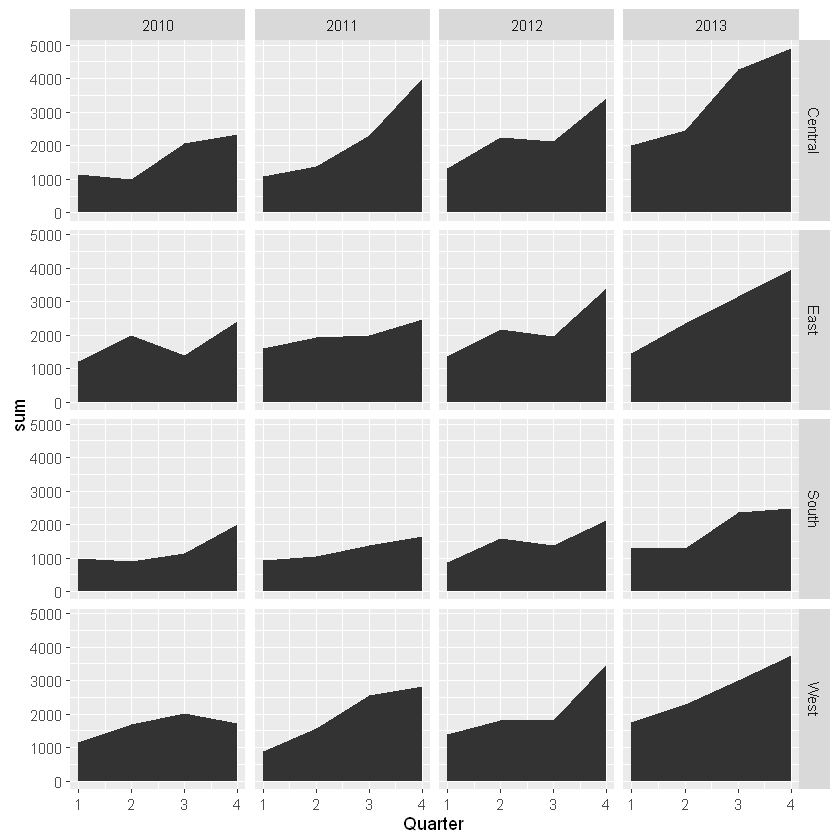

In [27]:
# rename : quarter 
colnames(sample_area)[2] <- "Quarter"
# two variable : facet_grid(Region ~ year) ; one variable : facet_grid(. ~ Region)
ggplot(sample_area,aes(x=Quarter, y=sum)) + geom_area() + facet_grid(Region ~ year)